
# Project: Investigate the FDI data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The analysis will explore the FBI data sets to answer the following questions: 
1. Which state experienced the highest growth in registration from the period available?
2. Which state experienced the lowest growth in registration from the period available?
3. What was the national trend from 2010 to 2017 in gun purchase ?
4. What is the distribution of current registered guns accross states?
5. Is there a correlation between the different kind of guns purchased by individuals accross the U.S.A?


#### Both sets investigated within this notebook come from the Federal Bureau of Investigation. 

The first set provides a record of guns transaction within the United States. 

The second set provides census data with different variable on the population.  

In [69]:
#Import of the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import numpy as np

#note: the Gun Data file was converted to .csv before hand. 

<a id='wrangling'></a>
# Data Wrangling

## 1. Exploration of both sets. 

### 1. Gun Data set

In [70]:
#As previously mentioned, the data set was converted from .xlsx to .csv
#Import and print the first lines
df_gun = pd.read_csv('gun_data.csv')
df_gun.head()

,month;state;permit;permit_recheck;handgun;long_gun;other;multiple;admin;prepawn_handgun;prepawn_long_gun;prepawn_other;redemption_handgun;redemption_long_gun;redemption_other;returned_handgun;returned_long_gun;returned_other;rentals_handgun;rentals_long_gun;private_sale_handgun;private_sale_long_gun;private_sale_other;return_to_seller_handgun;return_to_seller_long_gun;return_to_seller_other;totals
0,2017-09;Alabama;16717;0;5734;6320;221;317;0;15...
1,2017-09;Alaska;209;2;2320;2930;219;160;0;5;2;0...
2,2017-09;Arizona;5069;382;11063;7946;920;631;0;...
3,2017-09;Arkansas;2935;632;4347;6063;165;366;51...
4,2017-09;California;57839;0;37165;24581;2984;0;...


In [71]:
#Data needs to be aligned with columns - we will solve this now to be able to explore and identify further problems
df_gun = pd.read_csv('gun_data.csv', sep=';')
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [72]:
#Check summary of columns and non null values
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [73]:
#Check the data types within the set
df_gun.dtypes 

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [74]:
#Check if there are duplicates within the set
sum(df_gun.duplicated())

0

In [75]:
#Check if there are null values within the set
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [76]:
#Descriptive statistics for the set (excluding null values)
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


### 1.2 Census data set

In [77]:
#Import and print first lines
df_census = pd.read_csv('U.S. Census Data.csv')
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [78]:
#Check summary of columns and non null values
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [79]:
#Check if there are duplicates within the set
sum(df_census.duplicated())

3

In [80]:
#Check if there are null values within the set
df_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [81]:
#Descriptive statistics for the set (excluding null values)
df_census.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Language other than English spoken at home, pe...",(c),0.70%,7.30%,50.30%,50.90%,50.30%,3.30%,0.10%,51.60%,...,5686,0.048,50.40%,2.50%,1.90%,"17,795,901","44,077",1.50%,"5,778,708",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


## 2. Cleaning of the data sets

### 2.2 Gundata set cleaning

In [82]:
#Conversion of the data into data format
df_gun.month = pd.to_datetime(df_gun['month'], errors='coerce')

In [83]:
#verification of conversion
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [84]:
df_gun.dtypes

month                        datetime64[ns]
state                                object
permit                              float64
permit_recheck                      float64
handgun                             float64
long_gun                            float64
other                               float64
multiple                              int64
admin                               float64
prepawn_handgun                     float64
prepawn_long_gun                    float64
prepawn_other                       float64
redemption_handgun                  float64
redemption_long_gun                 float64
redemption_other                    float64
returned_handgun                    float64
returned_long_gun                   float64
returned_other                      float64
rentals_handgun                     float64
rentals_long_gun                    float64
private_sale_handgun                float64
private_sale_long_gun               float64
private_sale_other              

In [85]:
#Replacement of the current null values by means values for the numerical data points
col1 = df_gun.iloc[:,np.r_[2:26]].columns
for c in col1:
    c_mean = df_gun[c].mean()
    df_gun[c].fillna(c_mean, inplace = True)

In [86]:
#Verification of replacement of null values
df_gun.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

### 2.2 Census data set cleaning

In [87]:
#Cleaning duplicates for df.census (df_gun did not have any)
df_census.drop_duplicates(inplace=True)

In [88]:
#Verification of the change
sum(df_census.duplicated())

0

In [89]:
#Conversion of data type is needed as numerical values are currently being considerated as stirngs (objects).
#This applies for all the states raw (so excluding fact and fact notes)
#We will convert all values into floats from the third column onwards

col = df_census.iloc[:,2:].columns
for c in col:
    df_census[c] = df_census[c].str.extract('(\d+)').astype(float)

In [90]:
#Verification of conversion
df_census.dtypes

Fact               object
Fact Note          object
Alabama           float64
Alaska            float64
Arizona           float64
Arkansas          float64
California        float64
Colorado          float64
Connecticut       float64
Delaware          float64
Florida           float64
Georgia           float64
Hawaii            float64
Idaho             float64
Illinois          float64
Indiana           float64
Iowa              float64
Kansas            float64
Kentucky          float64
Louisiana         float64
Maine             float64
Maryland          float64
Massachusetts     float64
Michigan          float64
Minnesota         float64
Mississippi       float64
Missouri          float64
Montana           float64
Nebraska          float64
Nevada            float64
New Hampshire     float64
New Jersey        float64
New Mexico        float64
New York          float64
North Carolina    float64
North Dakota      float64
Ohio              float64
Oklahoma          float64
Oregon      

In [91]:
#We will now label the null values with a generic message - "Not available"
df_census.fillna('Not available', inplace=True)

In [92]:
#Verification of the replacement
df_census.isnull().sum()

Fact              0
Fact Note         0
Alabama           0
Alaska            0
Arizona           0
Arkansas          0
California        0
Colorado          0
Connecticut       0
Delaware          0
Florida           0
Georgia           0
Hawaii            0
Idaho             0
Illinois          0
Indiana           0
Iowa              0
Kansas            0
Kentucky          0
Louisiana         0
Maine             0
Maryland          0
Massachusetts     0
Michigan          0
Minnesota         0
Mississippi       0
Missouri          0
Montana           0
Nebraska          0
Nevada            0
New Hampshire     0
New Jersey        0
New Mexico        0
New York          0
North Carolina    0
North Dakota      0
Ohio              0
Oklahoma          0
Oregon            0
Pennsylvania      0
Rhode Island      0
South Carolina    0
South Dakota      0
Tennessee         0
Texas             0
Utah              0
Vermont           0
Virginia          0
Washington        0
West Virginia     0


#### Summary of the data cleaning section
##### df_gun: 

1.Conversion of date into date time format

2.Replacement of numerical null values by means values

##### df_census: 

1.Erasing the duplicates from the data set

2.Conversion of the numerical values to floats

3.Labelling the Null values with generic message “Not available”

<a id='eda'></a>
## Exploratory Data Analysis

### 1. Which state experienced the highest growth in registration from the period available?

In [93]:
# Grouping of states and sum 
gun_overall = df_gun.groupby(['month', 'state'])['totals'].sum()

In [94]:
#Retrieve the first and last purchase date available from the set
first_date = df_gun['month'].min()
last_date = df_gun['month'].max()

In [95]:
#Checking the first date available
first_date

Timestamp('1998-11-01 00:00:00')

In [96]:
#Cheking the last date available
last_date

Timestamp('2017-09-01 00:00:00')

In [97]:
#Substracting the last value to the first value 
gun_overall_growth = gun_overall.loc[last_date] - gun_overall.loc[first_date]
gun_overall_growth.idxmax()

'Kentucky'

In [98]:
#The state with the highest registration growth is Kentucky
gun_overall_growth.loc['Kentucky']

397866

Kentucky experienced the highest growth in registration over time from 1998 to 2017. Its current registration are of 397 866

### 2. Which state experienced the lowest growth in registration from the period available?

In [99]:
#Using the previous grouping, we determine minimum value
gun_overall_growth.idxmin()

'Virgin Islands'

In [100]:
#The state with the lowest registration growth is Virgin Island
gun_overall_growth.loc['Virgin Islands']

9

Virgin Islands experienced the lowest growth in registration from 1998 to 2017. Its current registration of are 9 only. 

### 3. What was the national trend from 2010 to 2017 in gun purchase ?

In [101]:
#Creation of a new data set with the relevant data points from the df_gun data set.
df_national_trend = df_gun[['month','totals']]
df_national_trend.head()

,month,totals
0,2017-09-01,32019
1,2017-09-01,6303
2,2017-09-01,28394
3,2017-09-01,17747
4,2017-09-01,123506


In [102]:
#Verification of data types
df_national_trend.dtypes

month     datetime64[ns]
totals             int64
dtype: object

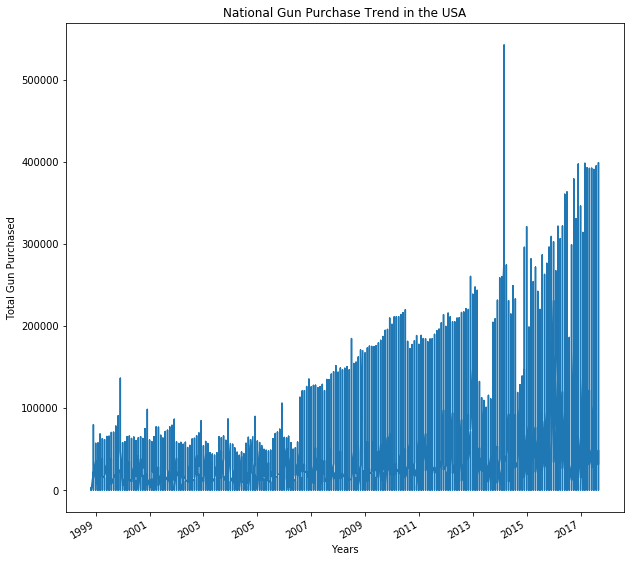

In [103]:
#Creation of a figure using matplotlib to visualize the new set.
df_national_trend.plot(x ='month', y='totals', kind = 'line', legend=False, title='National Gun Purchase Trend in the USA',figsize=(10,10))
plt.xlabel("Years")
plt.ylabel("Total Gun Purchased")
plt.show()

In [104]:
#Extracting a new data set by grouping data points from df_gun to showcase a relative evolution (monthly average)
df_dist = df_gun.groupby(['month'])['totals'].sum()
df_dist.head()

month
1998-11-01     21176
1998-12-01    870722
1999-01-01    585974
1999-02-01    690215
1999-03-01    741687
Name: totals, dtype: int64

/opt/conda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


Text(0.5,1,'National Gun Purchase Trend - Monthly Total Average')

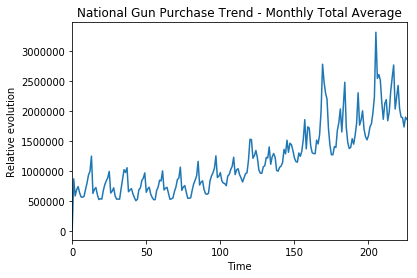

In [105]:
#Using matplotib to generate the figure resulting of the new data set 
#Figure is based on the monthly total average to unified and provide better evolution overview over time
dist = sns.tsplot(data = df_dist)
plt.xlabel("Time")
plt.ylabel("Relative evolution")
plt.title("National Gun Purchase Trend - Monthly Total Average")


Overall, we observe a constant increase of total gun purchase from 1998 to 2017 in the USA. A significant acceleration of purchase mointh over month can be oberved in late 2006. The data also desmonstrate two significant few months slow down between 2013 and 2015 as well as a very short and extrem pick in 2014.

### 4. What is the distribution of current registered guns accross states?

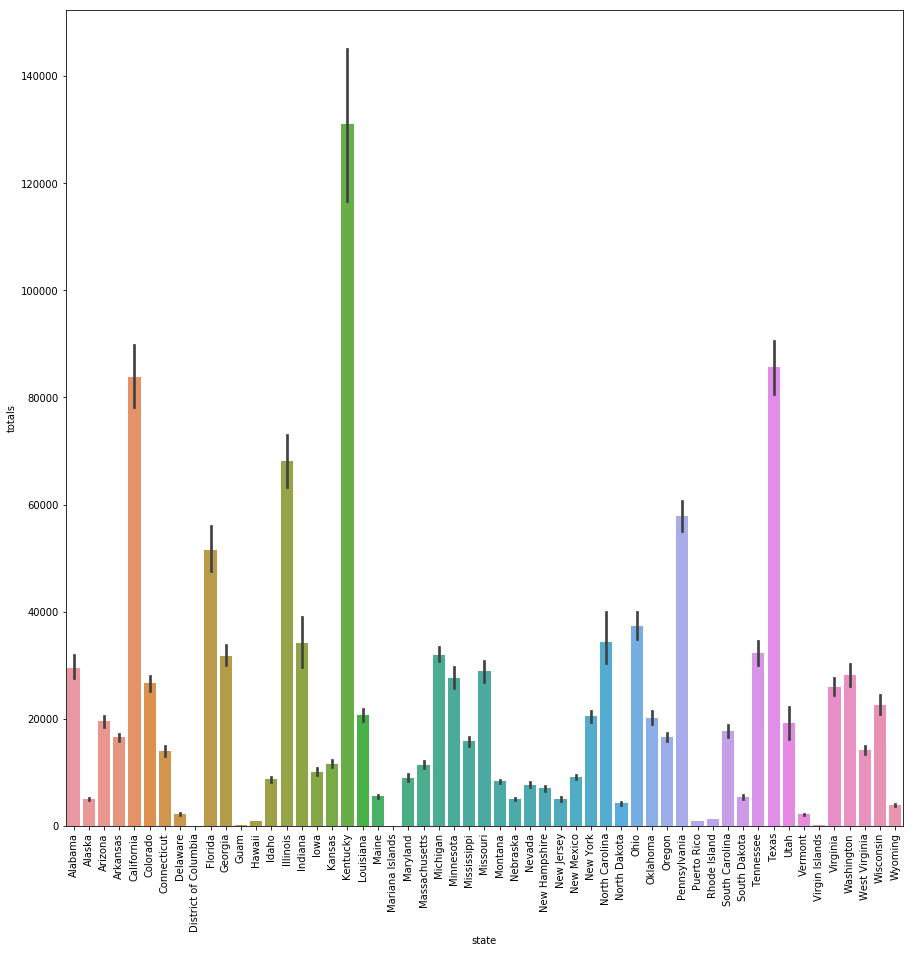

In [106]:
#Using seaborn to generate a figure combining state and total of purchase from the df_gun data set.
plt.subplots(figsize=(15,15))
plt.xticks(rotation=90);
sns.barplot(x='state', y='totals', data=df_gun,)

We can see that Kentucky has the highest total gun registration. This can be correlated with the fact that the state experienced the highest increase in registration from 1998 to 2017 as mentioned in first question. The figure shows that eventhough South States tend to have high gun registration, states such as Pennsylvania or Illinois are present in the top five nationally (both being located in the North of the USA). 

### 5. Is there a correlation between the different kind of guns purchased by individuals accross the U.S.A?


In [107]:
#Creation of a new data frame with the required data points 
df_corr = df_gun[['permit','handgun','long_gun','other']]
df_corr.head()

,permit,handgun,long_gun,other
0,16717.0,5734.0,6320.0,221.0
1,209.0,2320.0,2930.0,219.0
2,5069.0,11063.0,7946.0,920.0
3,2935.0,4347.0,6063.0,165.0
4,57839.0,37165.0,24581.0,2984.0


In [108]:
#Creation of a simple correlation matrix to present the results 
corrMatrix = df_corr.corr()
print (corrMatrix)

            permit   handgun  long_gun     other
permit    1.000000  0.224369  0.140952  0.096777
handgun   0.224369  1.000000  0.580547  0.354679
long_gun  0.140952  0.580547  1.000000  0.274803
other     0.096777  0.354679  0.274803  1.000000


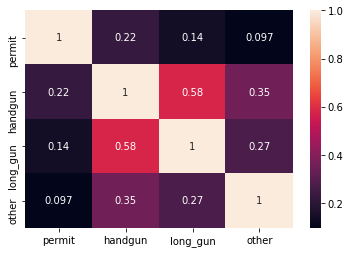

In [109]:
#Creation of a correlation matrix using seaborn for better visualisation
corrMatrix = df_corr.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

We can observe an important correlation between the purchase of long and hand gun. Considering the data for the entire country, states in which individuals purchased either long or hand gun tend to have high sells for the other type of weapon. We can also observe that the purchase of "other" type of weapons (neither hand or long) present a weaker correlation with the purchase of long gun than with short gun. This is very likely due to regulation. Some states have strong restriction on long gun sales, which might lead customers to purchase "others" type of guns with softer regulation. But this could also be due to urbanisation as long gun sales might be lower within dense urban areas. Further investigation are needed to draw conclusion. 

<a id='conclusions'></a>
## Conclusions

We can observe a lot of disparity in relation with gun purchase among the different states of the U.S.A. Utah experienced the highest growth over the period 1998 to 2017 with almost 400 000 transactions while the Virgin Islands registered only 9 transactions over the same period. The national gun purchase trend was upward, with an increase in the speed of evolution from the end of 2006. The increase has been continously fastering, apart from two significant slowdown between 2013 and 2015 which would need further research in relation with external factors to be understood. Along with this national upward trend, we however observe significant disparities in term of weapons detention accross the country. Eventhough South States have in proportion high guns registration, with Kentucky being the highest, several states located in the North also display high gun registration. The South/North geographical position displays a correlation but not sufficient, further investigation in relation with urbanism could provide more meaningfull results. Considering national data, short and long gun sell present a quite important correlation. States in which the sales for one of these type of gun have been strong are very likely to have experienced strong sales for the others. It also seems that states high sells of "others" types of gun present a weak correlation with the sales of long gun. This could be the outcome of regulation on long guns, leading customers to purchase other types of weapon, or the urbanisation level, as rural area might be better suited for long guns. 

#### Limitations: 
1. Some data were missing and had to be replaced to proceed with the analysis. 
2. Further consideration of the density and other variables related to urbanism would need to be considered to provide a more meaningfull correlation of geographical gun detention repartition within the country. 
3. Regulations and the type of area in terms of urbanism would be needed to further investigate the correlation between the purchase of the different gun types. 

In [110]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0